### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']


# display all columns
pd.set_option('max_columns', None, 'max_rows', None, 'display.float_format', lambda x: '%.3f' % x)

### Read Data 

In [2]:
# Read Data

path = '/content/drive/MyDrive/Rakamin/Virtual Internship/IDX Partners/Week 4/loan_data_2007_2014.csv'
data = pd.read_csv(path)

data.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
277774,277774,31157576,33730834,30000,30000,30000.000,36 months,10.150,970.130,B,B2,Vice President Of Entertainment,10+ years,MORTGAGE,480000.000,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,077xx,NJ,6.400,0.000,Feb-87,1.000,NaN,NaN,19.000,0.000,58393,65.900,45.000,f,18594.140,18594.140,14518.120,14518.120,11405.860,3112.260,0.000,0.000,0.000,Jan-16,970.130,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,0.000,503637.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88600.000,NaN,NaN,NaN
118784,118784,6115063,7597229,10000,10000,10000.000,36 months,11.550,330.000,B,B3,NaN,5 years,RENT,65000.000,Source Verified,Jul-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Loan1,816xx,CO,16.840,0.000,Dec-00,1.000,37.000,NaN,6.000,0.000,20039,59.600,14.000,f,1917.290,1917.290,9896.710,9896.710,8082.710,1814.000,0.000,0.000,0.000,Jan-16,330.000,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,0.000,26469.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33604.000,NaN,NaN,NaN
199008,199008,1521705,1785514,2400,2400,2400.000,36 months,8.900,76.210,A,A5,coca-cola refreshments,10+ years,RENT,60000.000,Not Verified,Sep-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 09/05/12 > my company has ...,other,car loan,170xx,PA,21.020,0.000,Apr-91,0.000,25.000,NaN,9.000,0.000,6538,31.000,41.000,f,0.000,0.000,2723.078,2723.080,2400.000,323.080,0.000,0.000,0.000,Jan-15,670.680,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,0.000,9223.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21100.000,NaN,NaN,NaN
14817,14817,760529,960805,9000,9000,8750.000,36 months,8.490,284.070,A,A5,State of Michigan,10+ years,MORTGAGE,59000.000,Source Verified,May-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/17/11 > My goal is to b...,debt_consolidation,tobedebtfree,490xx,MI,16.940,0.000,Jul-89,0.000,NaN,NaN,11.000,0.000,19866,84.900,35.000,f,0.000,0.000,10221.095,9937.030,9000.000,1221.100,0.000,0.000,0.000,Jun-14,318.330,NaN,Jun-14,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340122,340122,22401535,24734478,9000,9000,9000.000,36 months,10.990,294.610,B,B3,Development Accountant,< 1 year,RENT,56000.000,Not Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,802xx,CO,5.120,0.000,Nov-04,0.000,NaN,95.000,5.000,1.000,9455,78.800,8.000,w,5116.070,5116.070,5008.370,5008.370,3883.930,1124.440,0.000,0.000,0.000,Dec-15,294.610,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,0.000,47728.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12000.000,NaN,NaN,NaN


*Key Takeaway*

*   The first column (`Unnamed: 0`) is just an index, we will drop it.



In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0.000,Feb-96,1.000,35.000,NaN,10.000,0.000,5598,21.000,37.000,f,0.000,0.000,12226.302,12226.300,10000.000,2209.330,16.970,0.000,0.000,Jan-15,357.480,NaN,Jan-15,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0.000,Jan-96,0.000,38.000,NaN,15.000,0.000,27783,53.900,38.000,f,766.900,766.900,3242.170,3242.170,2233.100,1009.070,0.000,0.000,0.000,Jan-16,67.790,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check Number of Rows & Features

print('Total Rows :', data.shape[0])
print('Total Features :', data.shape[1])

Total Rows : 466285
Total Features : 74


### Exploratory Data Analysis

In [5]:
# Create Data Info

list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null Num,Null %,Unique Num,Unique Sample'.split(','))
desc_df

,Feature,Data Type,Null Num,Null %,Unique Num,Unique Sample
0,id,int64,0,0.000,466285,"[1077501, 1077430, 1077175, 1076863]"
1,member_id,int64,0,0.000,466285,"[1296599, 1314167, 1313524, 1277178]"
2,loan_amnt,int64,0,0.000,1352,"[5000, 2500, 2400, 10000]"
3,funded_amnt,int64,0,0.000,1354,"[5000, 2500, 2400, 10000]"
4,funded_amnt_inv,float64,0,0.000,9854,"[4975.0, 2500.0, 2400.0, 10000.0]"
5,term,object,0,0.000,2,"[ 36 months, 60 months]"
6,int_rate,float64,0,0.000,506,"[10.65, 15.27, 15.96, 13.49]"
7,installment,float64,0,0.000,55622,"[162.87, 59.83, 84.33, 339.31]"
8,grade,object,0,0.000,7,"[B, C, A, E]"
9,sub_grade,object,0,0.000,35,"[B2, C4, C5, C1]"


*Key Takeaways*

*   There are some features that have pretty much missing values. Moreover, some features contain only missing values.
*   There are some features that have incorrect data type. We will handle it later such as `earliest_cr_line`, `issue_d`, etc.
*   There are some categoric features that can be manipulated into numeric features such as `emp_length`, etc.
*    There are some categoric features with high cardinality or only single value, perhaps we will handle it later.

#### Descriptive Statistics

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.000,13079729.906,10893711.625,54734.000,3639987.000,10107897.000,20731209.000,38098114.000
member_id,466285.000,14597660.623,11682367.441,70473.000,4379705.000,11941075.000,23001541.000,40860827.000
loan_amnt,466285.000,14317.278,8286.509,500.000,8000.000,12000.000,20000.000,35000.000
funded_amnt,466285.000,14291.801,8274.371,500.000,8000.000,12000.000,20000.000,35000.000
funded_amnt_inv,466285.000,14222.330,8297.638,0.000,8000.000,12000.000,19950.000,35000.000
int_rate,466285.000,13.829,4.358,5.420,10.990,13.660,16.490,26.060
installment,466285.000,432.061,243.486,15.670,256.690,379.890,566.580,1409.990
annual_inc,466281.000,73277.381,54963.569,1896.000,45000.000,63000.000,88960.000,7500000.000
dti,466285.000,17.219,7.851,0.000,11.360,16.870,22.780,39.990
delinq_2yrs,466256.000,0.285,0.797,0.000,0.000,0.000,0.000,29.000


*Key Takeaways*

*   There are no invalid entries for each feature.
*   Almost all of the numerical features are skewed.

In [7]:
data.describe(exclude=[np.number]).T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [8]:
# Grouping Features Based on Their Data Type

num = data.select_dtypes(include=[np.number]).columns
cat = data.select_dtypes(exclude=[np.number]).columns

#### Visualization Function

In [9]:
# Create Stacked Bar Chart Function

def plot_stacked_bar_chart(df, title, figsize):
  # create chart
  df.plot(kind='barh', stacked=True, color = ['#9e9e9e', '#7a0200'], width = 0.6, figsize = figsize)
  plt.title(title, fontsize=14)
  plt.xlabel("Borrower's Status Rate (%)", size=12)
  plt.legend(["Good", "Bad"], loc='lower right')

  # create annotation
  y_numbers = range(df.shape[0])
  for i in y_numbers:
    if df[0][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = (df[0][i]/2),
              s = (str(round((df[0][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')
    if df[1][i] == 0:
      continue
    else:
      plt.text(y = y_numbers[i], x = 1-(df[1][i]/2),
              s = (str(round((df[1][i]*100),2))) + '%',
              size = 12, ha='center', va='center', color = 'white')

  plt.tight_layout()


# Create Probability Chart Function

def plot_kde_proba_chart(df, x, hue, title, figsize):
  # create chart
  sns.kdeplot(data = df, x = x, hue = hue, multiple='fill', palette=['#9e9e9e', '#7a0200'])
  plt.title(title, fontsize=14)
  plt.xlabel(x, size=12)
  plt.ylabel("Borrower's Bad Status Probability", size=12)
  plt.legend(["Bad", "Good"], loc='upper left')

#### Univariate Analysis

##### Loan Status Analysis

In [10]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

*Key Takeaways*

As shown above, the loan status has many categories.

- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.

Based on those descriptions, We will create a new features whether the loan status is `Good` or `Bad`. 

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [11]:
good_status = ['Fully Paid', 'Current']

data_viz = data.copy()

data_viz['target'] = data_viz['loan_status'].apply(lambda x: 0 if x in good_status else 1)

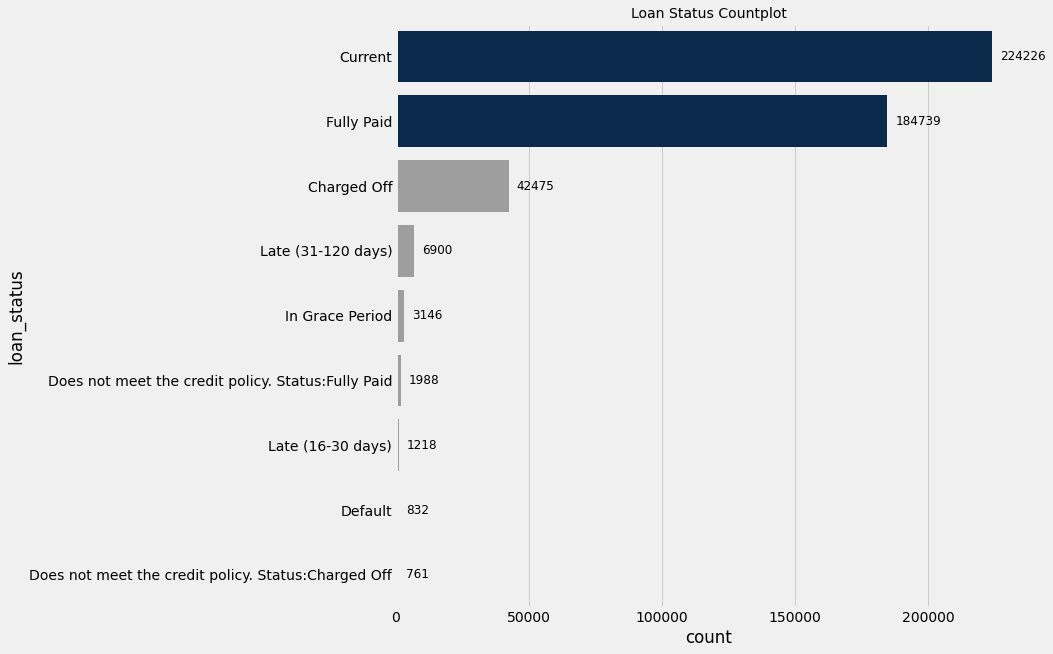

In [12]:
# Create Countplot by Loan Status

plt.figure(figsize=(10,10))
sns.countplot(y=data['loan_status'], palette=['#002855']*2 + ['#9e9e9e']*7, order = data['loan_status'].value_counts().index)
plt.title('Loan Status Countplot', fontsize=14)
y_numbers = range(9)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = data['loan_status'].value_counts()[i]+(3000), s = str(round(data['loan_status'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')

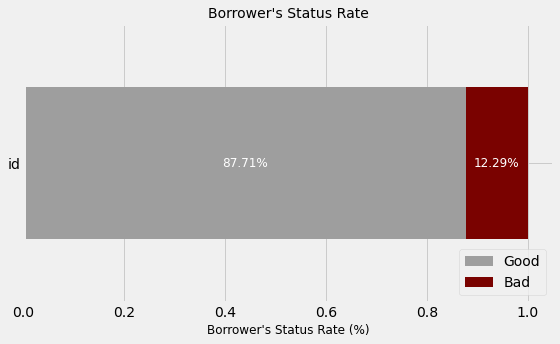

In [13]:
# Create Status Rate Chart

good_rate = data_viz.groupby('target').agg({'id' : 'count'}).T
good_rate = good_rate.div(good_rate.sum(axis=1), axis=0).sort_values(by = 1)
plot_stacked_bar_chart(good_rate, 'Borrower\'s Status Rate', (8,5))

##### Employment Title

In [14]:
data['emp_title'].value_counts().iloc[:10]

Teacher             5399
Manager             4438
Registered Nurse    2316
RN                  2204
Supervisor          1967
Project Manager     1624
Sales               1624
Owner               1527
Office Manager      1395
manager             1312
Name: emp_title, dtype: int64

*Key Takeaways*



*   There are some employment titles that have similar level, such as manager. We can see the most frequent word using a wordcloud.
*   RN stands for Registered Nurse

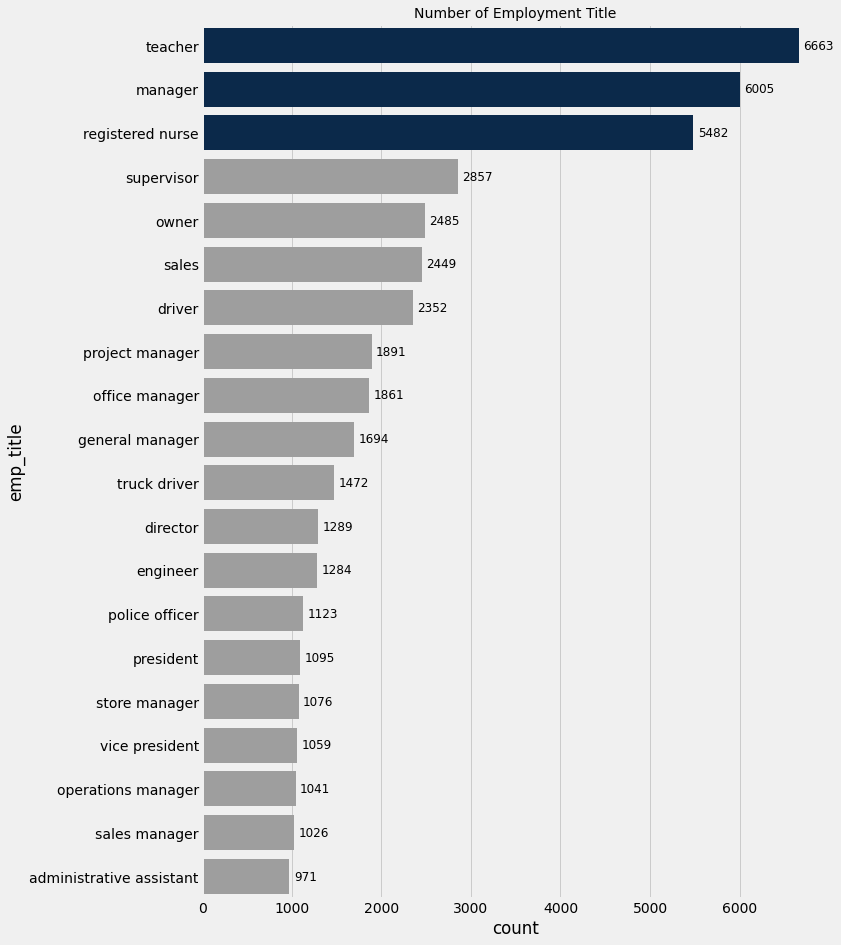

In [15]:
# Create Countplot by Loan Status

plt.figure(figsize=(10,15))
sns.countplot(y=data['emp_title'].replace({'RN':'Registered Nurse'}).str.lower(), palette=['#002855']*3 + ['#9e9e9e']*17, order = data['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts().iloc[:20].index)
plt.title('Number of Employment Title', fontsize=14)
y_numbers = range(20)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = data['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts()[i]+(50),
             s = str(round(data['emp_title'].replace({'RN':'Registered Nurse'}).str.lower().value_counts()[i], 2)), size = 12, ha = 'left', va='center')

*Key Takeaway*

*   Most borrowers employment title are teacher, manager, and registered nurse. We can usse this insight for further recommendation.

##### Credit Purpose

In [16]:
data['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

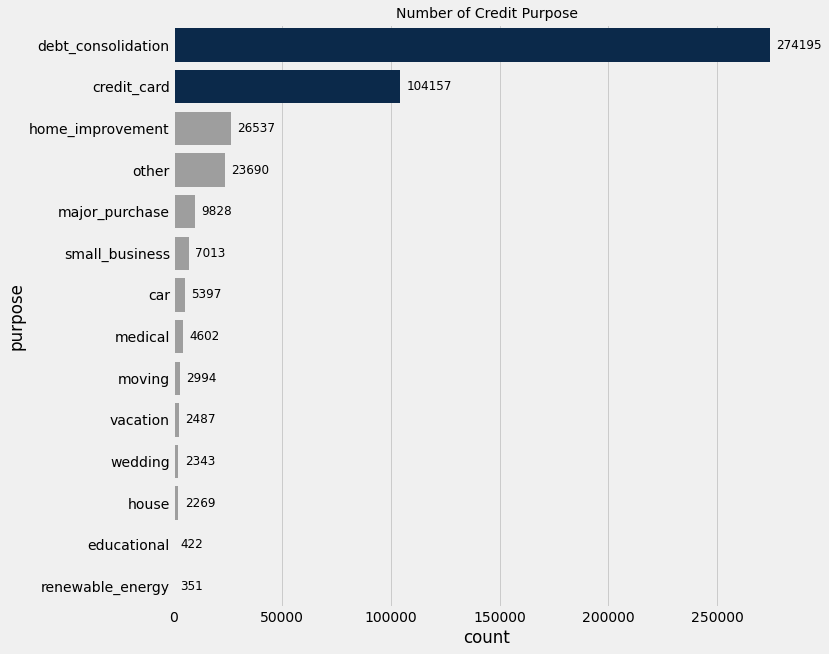

In [17]:
# Create Countplot by Loan Status

plt.figure(figsize=(10,10))
sns.countplot(y=data['purpose'], palette=['#002855']*2 + ['#9e9e9e']*12, order = data['purpose'].value_counts().index)
plt.title('Number of Credit Purpose', fontsize=14)
y_numbers = range(14)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = data['purpose'].value_counts()[i]+(3000), s = str(round(data['purpose'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')

*Key Takeaway*

*   Most borrowers credit purpose are for debt consolidation and credit card.

##### Grade

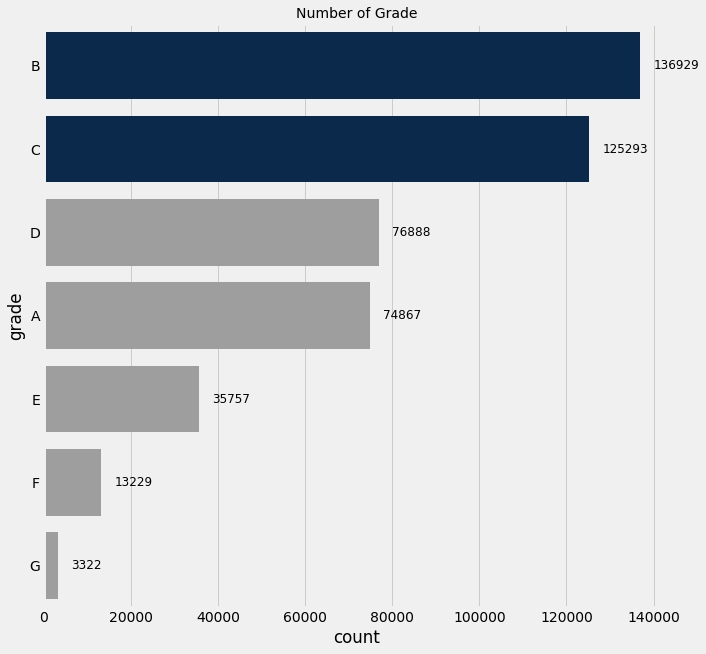

In [18]:
# Create Countplot by Loan Status

plt.figure(figsize=(10,10))
sns.countplot(y=data['grade'], palette=['#002855']*2 + ['#9e9e9e']*5, order = data['grade'].value_counts().index)
plt.title('Number of Grade', fontsize=14)
y_numbers = range(7)
for i in y_numbers:
    plt.text(y = y_numbers[i], x = data['grade'].value_counts()[i]+(3000), s = str(round(data['grade'].value_counts()[i], 2)), size = 12, ha = 'left', va='center')

*Key Takeaway*

*   Most borrowers grade score are come from grade B and C.

#### Bivariate Analysis

##### Grade

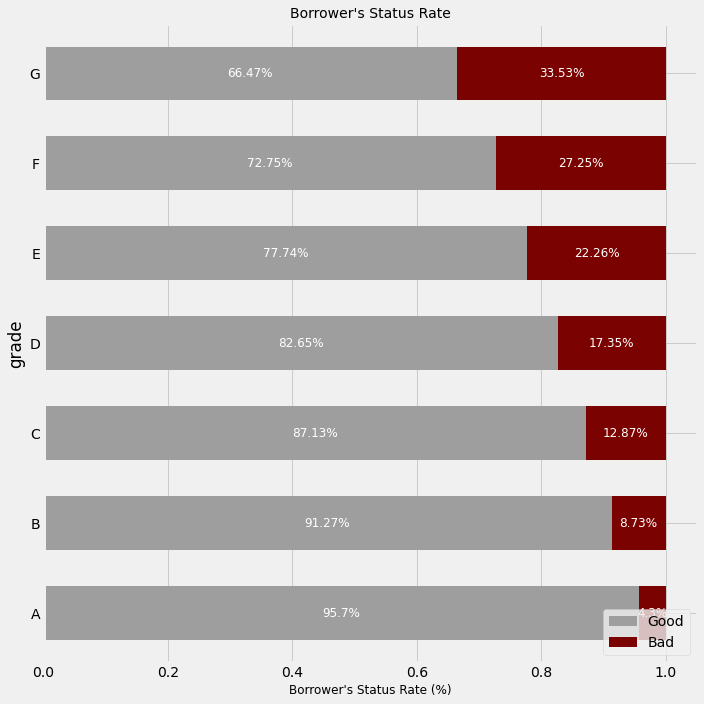

In [19]:
# Create Issue Date Bad Percentage Chart

issue = pd.crosstab(data_viz['grade'], data_viz['target'])
issue = issue.div(issue.sum(axis=1).astype(float), axis=0).sort_values(by=1)
plot_stacked_bar_chart(issue, 'Borrower\'s Status Rate', (10,10))
plt.show()

In [20]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


In [21]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
column_date_split = list()

for col in column_date:
  # define the column names
  col_month = f'{col}_month'
  col_year = f'{col}_year'
  col_update = f'{col}_update'

  column_date_split.append(col_update)
  column_date_split.append(col_month)
  column_date_split.append(col_year)

  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))


  # update date format
  date_update = tmp['month'] + '-' + tmp['year']

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data_viz[col_month] = tmp['month']
  data_viz[col_year] = tmp['year']
  
  # update date format
  # data_viz[col_update] = pd.to_datetime(date_update, errors='coerce')
  data_viz[col_update] = date_update

  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [22]:
data_viz.loc[:5, column_date]

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Dec-11,Jan-15,Jan-16,Jan-85
1,Dec-11,Apr-13,Sep-13,Apr-99
2,Dec-11,Jun-14,Jan-16,Nov-01
3,Dec-11,Jan-15,Jan-15,Feb-96
4,Dec-11,Jan-16,Jan-16,Jan-96
5,Dec-11,Jan-15,Sep-15,Nov-04


In [23]:
data_viz.loc[:5, column_date_split]

,issue_d_update,issue_d_month,issue_d_year,last_pymnt_d_update,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_update,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_update,earliest_cr_line_month,earliest_cr_line_year
0,Dec-2011,Dec,2011,Jan-2015,Jan,2015.000,Jan-2016,Jan,2016.000,Jan-1985,Jan,1985.000
1,Dec-2011,Dec,2011,Apr-2013,Apr,2013.000,Sep-2013,Sep,2013.000,Apr-1999,Apr,1999.000
2,Dec-2011,Dec,2011,Jun-2014,Jun,2014.000,Jan-2016,Jan,2016.000,Nov-2001,Nov,2001.000
3,Dec-2011,Dec,2011,Jan-2015,Jan,2015.000,Jan-2015,Jan,2015.000,Feb-1996,Feb,1996.000
4,Dec-2011,Dec,2011,Jan-2016,Jan,2016.000,Jan-2016,Jan,2016.000,Jan-1996,Jan,1996.000
5,Dec-2011,Dec,2011,Jan-2015,Jan,2015.000,Sep-2015,Sep,2015.000,Nov-2004,Nov,2004.000


##### Issue Date

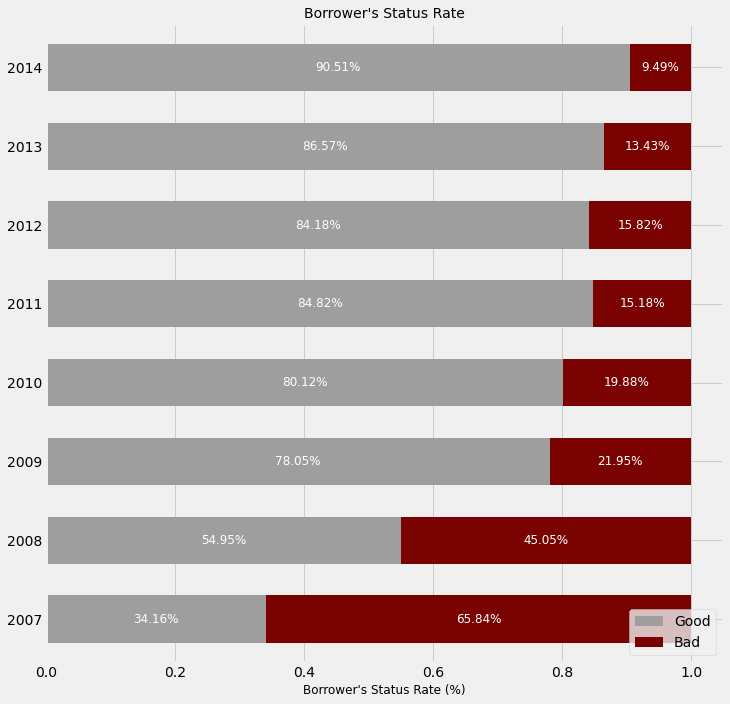

In [24]:
# Create Issue Date Bad Percentage Chart

issue = pd.crosstab(data_viz['issue_d_year'], data_viz['target'])
issue = issue.div(issue.sum(axis=1).astype(float), axis=0)
issue.index = np.arange(8)
plot_stacked_bar_chart(issue, 'Borrower\'s Status Rate', (10,10))
plt.yticks(np.arange(8), np.arange(2007,2015))
plt.show()

*Key Takeaways*

*   The earlier the issue date is, the higher the probability of a borrower to have a bad loan status.

##### Last Credit Pull Date

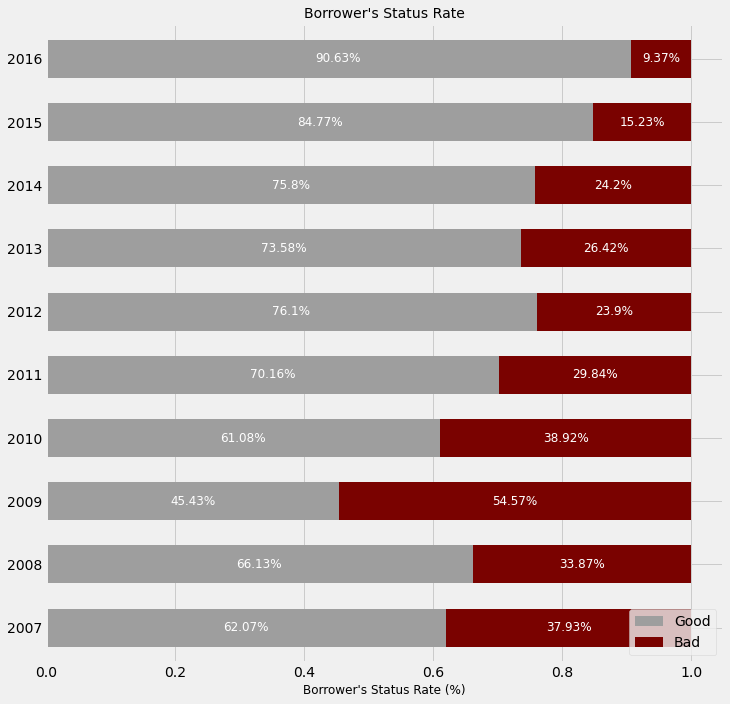

In [25]:
# Create Issue Date Bad Percentage Chart

issue = pd.crosstab(data_viz['last_credit_pull_d_year'], data_viz['target'])
issue = issue.div(issue.sum(axis=1).astype(float), axis=0)
issue.index = np.arange(10)
plot_stacked_bar_chart(issue, 'Borrower\'s Status Rate', (10,10))
plt.yticks(np.arange(10), np.arange(2007,2017))
plt.show()

*Key Takeaways*

*   From this plot, we can't really see a pattern from the borrowers' last credit pull date.

##### Last Payment Date

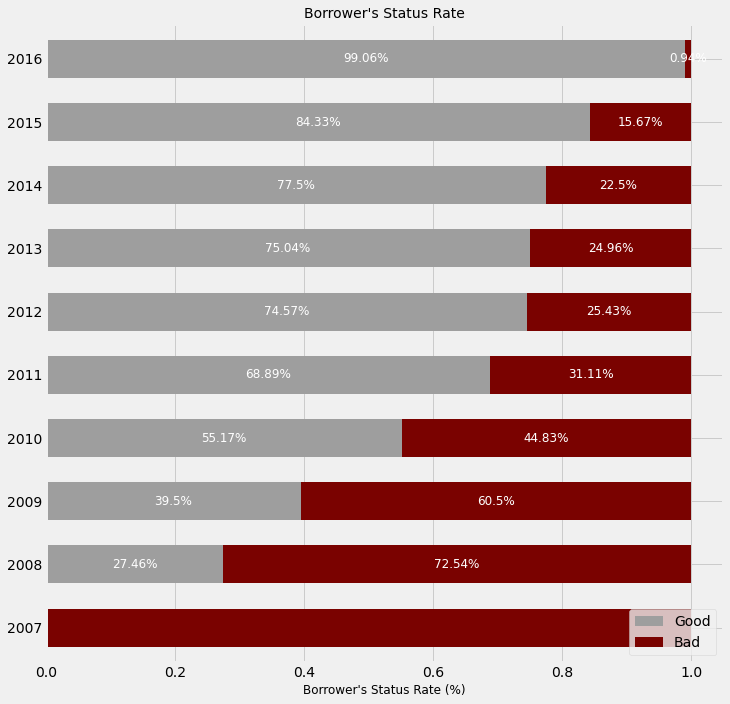

In [26]:
# Create Issue Date Bad Percentage Chart

issue = pd.crosstab(data_viz['last_pymnt_d_year'], data_viz['target'])
issue = issue.div(issue.sum(axis=1).astype(float), axis=0)
issue.index = np.arange(10)
plot_stacked_bar_chart(issue, 'Borrower\'s Status Rate', (10,10))
plt.yticks(np.arange(10), np.arange(2007,2017))
plt.show()

*Key Takeaways*

*   If the last payment has been made a long time ago, then the probability of a borrower to have a bad loan status will be higher

##### Interest Rate

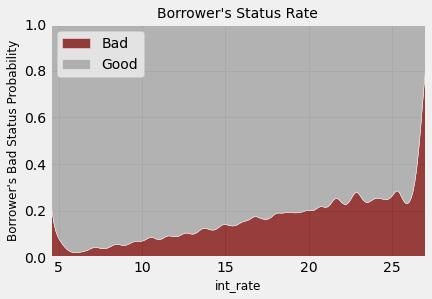

In [27]:
plot_kde_proba_chart(df = data_viz, x = 'int_rate', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   Borrowers with high-interest rates have a higher probability to have a bad loan status than those with a low-interest rate.

##### Installment

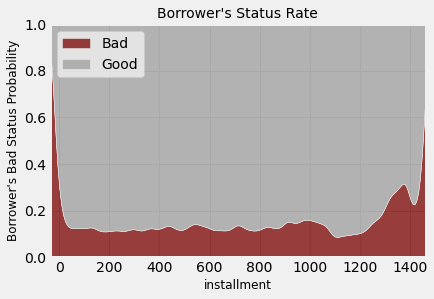

In [28]:
plot_kde_proba_chart(df = data_viz, x = 'installment', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   From this plot, we can't really see a pattern from the borrowers' installments.

##### Total Acc

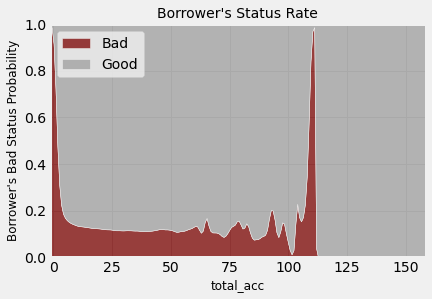

In [29]:
plot_kde_proba_chart(df = data_viz, x = 'total_acc', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   From this plot, we can't really see a pattern from the borrowers' total acc.

##### Total Received Principal

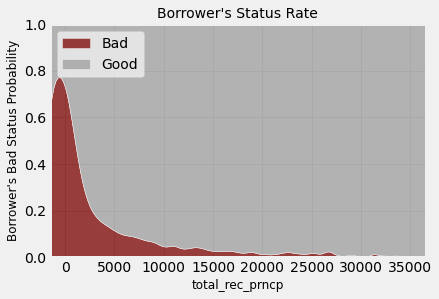

In [30]:
plot_kde_proba_chart(df = data_viz, x = 'total_rec_prncp', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   Borrowers with low total received principal have a higher probability to have a bad loan status than those with a high total received principal.

##### Outstanding Principal

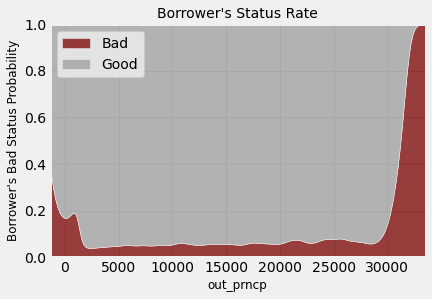

In [31]:
plot_kde_proba_chart(df = data_viz, x = 'out_prncp', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

##### Total Payment

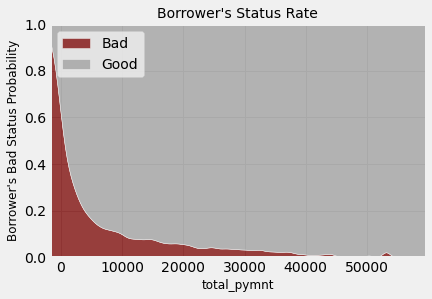

In [32]:
plot_kde_proba_chart(df = data_viz, x = 'total_pymnt', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   Borrowers with low totalpayment have a higher probability to have a bad loan status than those with a high total payment.

##### Total Payment Amount

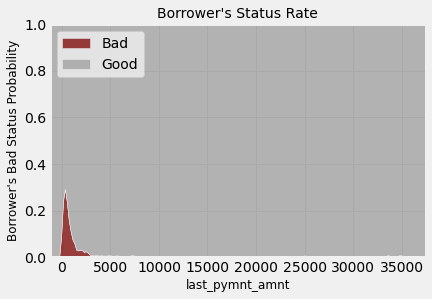

In [33]:
plot_kde_proba_chart(df = data_viz, x = 'last_pymnt_amnt', hue =  'target', title = 'Borrower\'s Status Rate', figsize = (10,10))

*Key Takeaways*

*   From this plot, we can't really see a pattern from the borrowers' last payment amount.

### Pre Processing

In [34]:
# Check Duplicated Data

print(f'Number of duplicated data = {data.duplicated().sum()}')

Number of duplicated data = 0


*Key Takeaways*

*   There's no duplicated value.

#### Drop Features

In [35]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'application_type'
    , 'title'
    , 'emp_title'
    , 'addr_state'
    
    # expert judgment
    , 'sub_grade'
]

In [36]:
data = data.drop(cols_to_drop, axis=1)

In [37]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
402802,21600,21600,21600.000,60 months,10.990,469.530,B,1 year,RENT,200000.000,Not Verified,Apr-14,Fully Paid,n,debt_consolidation,12.430,0.000,Apr-02,2.000,NaN,NaN,15.000,0.000,1464,5.400,31.000,f,0.000,0.000,24613.590,24613.590,21600.000,3013.590,0.000,0.000,0.000,Sep-15,17101.110,NaN,Jan-16,0.000,NaN,1,0.000,0.000,146600.000,27200.000
33940,6125,6125,6075.000,36 months,8.590,193.620,A,3 years,OWN,61360.000,Not Verified,Nov-09,Fully Paid,n,debt_consolidation,10.210,0.000,Oct-00,0.000,NaN,NaN,16.000,0.000,6775,22.000,28.000,f,0.000,0.000,6969.990,6913.090,6125.000,844.990,0.000,0.000,0.000,Dec-12,196.380,NaN,Jan-16,0.000,NaN,1,0.000,NaN,NaN,NaN
229366,18000,18000,18000.000,36 months,11.710,595.370,B,NaN,OWN,37000.000,Verified,Jan-12,Fully Paid,n,debt_consolidation,15.210,0.000,Mar-96,0.000,47.000,NaN,6.000,0.000,10861,82.900,33.000,f,0.000,0.000,21428.741,21428.740,18000.000,3428.740,0.000,0.000,0.000,Jan-15,612.540,NaN,Jan-16,0.000,NaN,1,0.000,NaN,NaN,NaN
283977,14000,14000,14000.000,36 months,13.350,474.080,C,6 years,MORTGAGE,75000.000,Source Verified,Oct-14,Current,n,home_improvement,28.940,0.000,Apr-00,1.000,36.000,NaN,16.000,0.000,32414,74.700,26.000,w,8834.660,8834.660,7100.820,7100.820,5165.340,1935.480,0.000,0.000,0.000,Jan-16,474.080,Feb-16,Jan-16,0.000,NaN,1,0.000,0.000,183266.000,43400.000
429185,12000,12000,12000.000,36 months,13.650,408.100,C,10+ years,RENT,56000.000,Not Verified,Mar-14,Fully Paid,n,debt_consolidation,12.000,0.000,Oct-99,0.000,42.000,NaN,11.000,0.000,6186,55.200,26.000,f,0.000,0.000,13917.550,13917.550,12000.000,1917.550,0.000,0.000,0.000,Aug-15,7387.950,NaN,Jan-16,0.000,72.000,1,0.000,1196.000,15634.000,11200.000


#### Define Target Feature

In [38]:
data['bad_flag'] = np.where(data['loan_status'].isin(good_status), 0, 1)

*Key Takeaways*

*   After flagging bad/good loans, it can be seen that the number of individuals marked as bad loans is much less than good loans. This causes this problem to become an imbalanced dataset problem.

In [39]:
data.drop('loan_status', axis=1, inplace=True)

#### Feature Engineering

##### Employment Length

In [40]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [42]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [43]:
data.drop('emp_length', axis=1, inplace=True)

##### Term

In [44]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [45]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [46]:
data.drop('term', axis=1, inplace=True)

##### Earliest Credit Line

*Notes*

*   Modified `earliest_cr_line` from month-year format to calculate how much time has passed since that time. To do this, it is common to use reference date = today. However, because this dataset is a 2007-2014 dataset, it will be more relevant to use a reference date around 2017. In this example, I use 2017-12-01 as the reference date.

In [47]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [48]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [49]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0   395.000
1   224.000
2   193.000
Name: mths_since_earliest_cr_line, dtype: float64

In [50]:
data['mths_since_earliest_cr_line'].describe()

count   466256.000
mean       239.482
std         93.975
min       -612.000
25%        183.000
50%        225.000
75%        285.000
max        587.000
Name: mths_since_earliest_cr_line, dtype: float64

In [51]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.000
1770,Sep-68,2068-09-01,-609.000
2799,Sep-64,2064-09-01,-561.000


*Key Takeaways*

*   It turns out that the negative value appears because the Python function misinterprets the year 62 to be the year 2062, when it should be 1962.

*   To overcome this, we can do further preprocessing if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know here that negative values are old data (1900s), it still makes sense if I change these values to the largest value.

In [52]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [53]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

##### Issue Date

In [54]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [55]:
data['mths_since_issue_d'].describe()

count   466285.000
mean        51.255
std         14.340
min         36.000
25%         41.000
50%         47.000
75%         57.000
max        126.000
Name: mths_since_issue_d, dtype: float64

In [56]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

##### Last Payment Date

In [57]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [58]:
data['mths_since_last_pymnt_d'].describe()

count   465909.000
mean        31.294
std         12.810
min         23.000
25%         23.000
50%         24.000
75%         35.000
max        120.000
Name: mths_since_last_pymnt_d, dtype: float64

In [59]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

##### Next Payment Date

In [60]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [61]:
data['mths_since_next_pymnt_d'].describe()

count   239071.000
mean        22.738
std          6.082
min         21.000
25%         22.000
50%         22.000
75%         22.000
max        120.000
Name: mths_since_next_pymnt_d, dtype: float64

In [62]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

##### Last Credit Pull Date

In [63]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [64]:
data['mths_since_last_credit_pull_d'].describe()

count   466243.000
mean        27.046
std          9.636
min         23.000
25%         23.000
50%         23.000
75%         25.000
max        127.000
Name: mths_since_last_credit_pull_d, dtype: float64

In [65]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

#### Numerical Features Check

In [66]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [67]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [68]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

#### Categorical Features Check

In [69]:
data.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

In [70]:
data.drop(['pymnt_plan'], axis=1, inplace=True)

In [71]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [72]:
data.drop(['policy_code'], axis=1, inplace=True)

#### Handling Missing Values

In [73]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record        86.567
mths_since_last_delinq        53.691
tot_coll_amt                  15.071
tot_cur_bal                   15.071
emp_length_int                 4.505
revol_util                     0.073
collections_12_mths_ex_med     0.031
delinq_2yrs                    0.006
inq_last_6mths                 0.006
open_acc                       0.006
pub_rec                        0.006
total_acc                      0.006
acc_now_delinq                 0.006
mths_since_earliest_cr_line    0.006
annual_inc                     0.001
dtype: float64

In [74]:
data.drop('mths_since_last_record', axis=1, inplace=True)

In [75]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

#### Categorical Feature Encoding

In [76]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [77]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [78]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Numerical Feature Transformation

In [79]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [80]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [81]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124,-0.730,-0.897,1.329,-0.357,0.179,-0.709,-1.641,-0.314,-0.125,1.159,-1.385,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,1.765,1.447
1,-1.426,0.331,-0.787,-2.066,-0.357,3.843,-0.709,-1.641,-0.314,-0.703,-1.966,-1.816,-0.694,-0.123,0.057,-0.084,-0.058,-0.012,-0.793,-1.524,1.623,-0.212,1.447
2,-1.438,0.489,-1.110,-1.082,-0.357,1.095,-0.709,-1.842,-0.314,-0.642,1.782,-1.298,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,-0.571,1.447
3,-0.521,-0.078,-0.438,0.354,-0.357,0.179,0.861,-0.238,-0.314,-0.514,-1.478,1.029,-0.694,3.099,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,0.227,1.447
4,-1.366,-0.261,0.122,0.092,-0.357,-0.737,0.992,0.765,-0.314,0.559,-0.094,1.115,-0.573,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,-1.258,1.623,0.239,1.447


#### Cleaned Data Model

In [82]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

In [83]:
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.124,-0.730,-0.897,1.329,-0.357,0.179,-0.709,-1.641,-0.314,-0.125,1.159,-1.385,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,1.765,1.447,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.426,0.331,-0.787,-2.066,-0.357,3.843,-0.709,-1.641,-0.314,-0.703,-1.966,-1.816,-0.694,-0.123,0.057,-0.084,-0.058,-0.012,-0.793,-1.524,1.623,-0.212,1.447,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.438,0.489,-1.110,-1.082,-0.357,1.095,-0.709,-1.842,-0.314,-0.642,1.782,-1.298,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,-0.571,1.447,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.521,-0.078,-0.438,0.354,-0.357,0.179,0.861,-0.238,-0.314,-0.514,-1.478,1.029,-0.694,3.099,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.616,0.227,1.447,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.366,-0.261,0.122,0.092,-0.357,-0.737,0.992,0.765,-0.314,0.559,-0.094,1.115,-0.573,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,-1.258,1.623,0.239,1.447,0


### Modeling

#### Splitting Data

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.shape, X_test.shape

((373028, 50), (93257, 50))

#### Train Data

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

#### Validation

In [89]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC - ROC

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

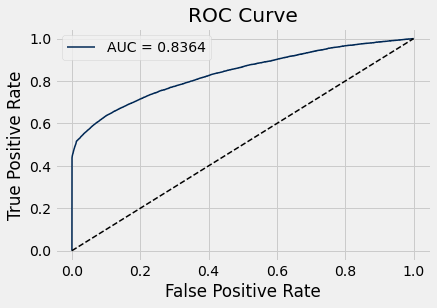

In [91]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc, color='#002855', linewidth=1.5)
plt.plot(fpr, fpr, linestyle = '--', color='k', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### Kolmogorov-Smirnov

In [92]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [93]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,352638,0,0.053,1,0,1,0.000,0.000,0.000
1,346851,0,0.054,2,0,2,0.000,0.000,0.000
2,334474,0,0.054,3,0,3,0.000,0.000,0.000
3,369212,0,0.054,4,0,4,0.000,0.000,0.000
4,365002,0,0.054,5,0,5,0.000,0.000,0.000


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5365')

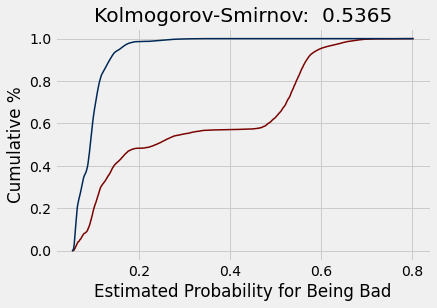

In [94]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='#7a0200', linewidth=1.5)
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='#002855', linewidth=1.5)
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

*Key Takeaways*

*   Based on the Model Validation, we have `AUC Score = 0.857` and `KS = 0.56` performance. In the credit risk modeling practice, AUC above 0.7 and KS above 0.3 are considered as a good performances.

---
*Recommendations*

*   Use the predictive model to make a decision either accept or decline the borrower’s credit application.
*   Evaluate and do some adjustment to the interest rate. Maybe we can adjust the interest rate based on borrowers’ default risk probability.
*   We should pay more attention to borrowers' loan dates because they tend to be late in their last payments.
*   Use segmented marketing for potential new borrowers to increase finance amount based on their needs and occupations.